In [1]:
import tensorflow as ts
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
input = Input((1,))
h1 = Dense(10, activation='relu')(input)
h2 = Dense(10, activation='relu')(h1)
output = Dense(1, activation='softmax')(h2)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

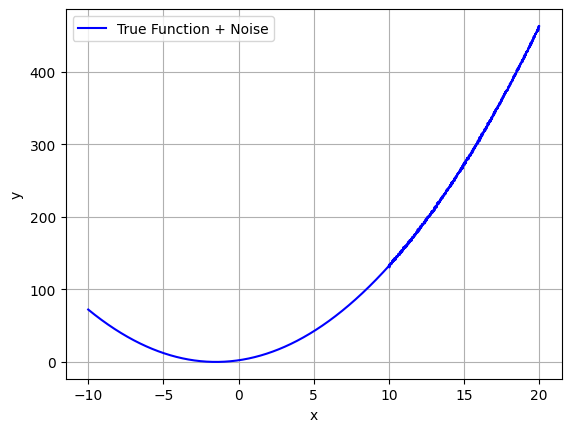

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return x*x + 3 * x + 2

def yn(x):
    return x*x + 3 * x + 2 + np.random.normal(0, 1, x.shape)

# Generate data
x = np.linspace(-10, 10, 1000)
x1 = np.linspace(10, 20, 1000)
y_true = y(x)
y_noisy = yn(x1)

# Plot the true + noisy function (just for reference)
plt.plot(np.concatenate((x, x1)), np.concatenate((y_true, y_noisy)), label='True Function + Noise', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Training data
x_train = np.concatenate((x, x1)).reshape(-1, 1)
y_train = np.concatenate((y_true, y_noisy))

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Evaluate
loss = model.evaluate(x_train, y_train)
print(f"Training Loss: {loss}")

Epoch 1/100


/home/noob_coder/Desktop/AI_LAB/my_env/lib/python3.12/site-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


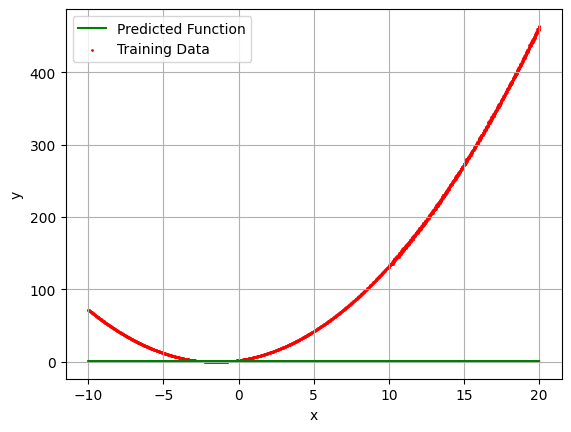

In [16]:
# Predict
y_pred = model.predict(x_train)

# Sort for smooth plot
sorted_indices = x_train[:, 0].argsort()
x_sorted = x_train[sorted_indices]
y_sorted = y_pred[sorted_indices]

# Plot predictions
plt.plot(x_sorted, y_sorted, label='Predicted Function', color='green')
plt.scatter(x_train, y_train, label='Training Data', color='red', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()